# Linear Regression Fundamentals
In the subfield of machine learning within artificial intelligence, linear regression plays a crucial role. It is one of the basic machine learning algorithms that is commonly used because of its simplicity and well understood characteristics.

Imagine you’re a *waiter at a restaurant*, and you’re curious about how much tip you might get from different tables. You’ve been keeping track of your tips, and you’ve noticed that there seems to be a relationship between the total bill and the tip amount. This is where linear regression can help us understand this relationship better!

**Outline:**

1. Dataset

2. Simple Linear Regression

3. Understanding Loss Functions and Model Optimization

4. Multiple Linear Regression

5. Handling Non-Numeric Features

#### **Importing Libraries**
We'll start by importing the necessary libraries and loading our dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import optimize

## 1. Dataset
*Seaborn statistical* library provides several built-in datasets and one of the most commonly used datasets is the **tips** dataset. This dataset contains information about the tips received by a waitstaff at a restaurant in the United States, including the total bill, tip amount, and other variables. Let’s load the dataset and take a look at some of the rows


In [3]:
# Load the dataset
data = sns.load_dataset("tips")

# Display a sample of the data
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size
222,8.58,1.92,Male,Yes,Fri,Lunch,1
34,17.78,3.27,Male,No,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
159,16.49,2.00,Male,No,Sun,Dinner,4
32,15.06,3.00,Female,No,Sat,Dinner,2


Each row of the above dataframe represents a table that was served by a worker at a restaurant. For example, in the first row, at a table the total bill was \$19.77 and the tip that was left was $2.00, approximately 10% of the total bill.

#### **Visualizing the Data**
We'll visualize the relationship between total bill and tip using a scatter plot.

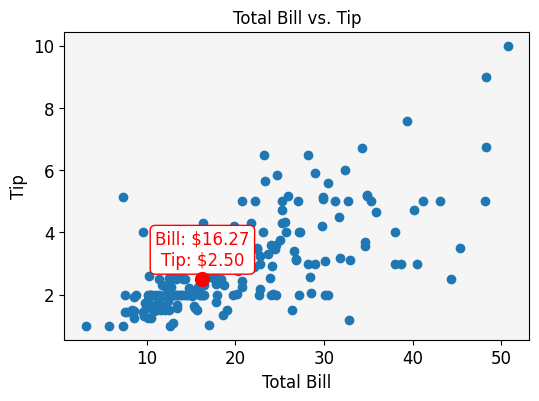

In [4]:
# Visualize the relationship between total bill and tip
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_facecolor('whitesmoke')

plt.scatter(data['total_bill'], data['tip'])

# Choose a random index
random_index = np.random.choice(data.index)

# Get the data for the chosen index
specific_point = data.loc[random_index]

# Plot the specific point
plt.scatter(specific_point['total_bill'], specific_point['tip'], color='red', s=100, zorder=5)

# Annotate the specific point
plt.annotate(f'Bill: ${specific_point["total_bill"]:.2f}\nTip: ${specific_point["tip"]:.2f}',
             (specific_point['total_bill'], specific_point['tip']),
             textcoords="offset points",
             xytext=(0,10),
             ha='center',
             color='red',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

# Add titles and labels
plt.title("Total Bill vs. Tip")
plt.xlabel("Total Bill", fontsize=12)
plt.ylabel("Tip", fontsize=12)

# Increase the size of the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Turn off the grid
plt.grid(False)

plt.savefig('scatter.png')
plt.show()

Each dot in the above plot represents a table served with the total bill amount on the bottom as x-axis, and the tip amount is on the y-axis.

**Observation:** From the above plot, we can observe a clear positive correlation between the total bill and the tip amount.

## 2. Simple Linear Regression
Linear regression is like *drawing the best straight line through a bunch of dots on a graph*. Each dot represents a piece of information we know, and the line helps us make educated guesses about things we don’t know.

Using the tips dataset, we can draw a straight line that best fits through the data points. This line is our “regression line”.

Now, let's create a simple linear regression model to predict the tip based on the total bill.

**Note:** It is a simple linear regression model where the model only considers a single feature, the total bill, to predict the tip amount and the relationship between the two variables is assumed to be linear.


#### **How to Build the Model?**
To build a simple linear regression model, we can use various libraries such as Seaborn, sklearn, Plotly and so on. In our case, we will use *sklearn* library as it is a powerful open-source machine learning library.

There are **three key steps** involved to build a model:

1. Instantiate a linear model object

2. Fit the model to training data

3. Use the trained model to make predictions

The goal is to train the model to try and predict the tip amount based on the single feature, total bill.

First, we set aside the features we want to use to make predictions and save it in a variable called X. Then, we set aside what we want to predict and save it in a variable called y.

In [5]:
# Prepare the data
X = data[['total_bill']]
y = data['tip']

Next, we import the `LinearRegression` model from **sklearn** and instantiate the model object.

In [7]:
# Create and fit a simple linear regression model
model = LinearRegression(fit_intercept = False)


When creating the model object in this particular example we set fit_intercept = False, because in real life, the tip associated with a \$0 total bill should probably be $0.

Next, we fit the model. This process trains the model by telling it the features we want to use to make predictions.

In [8]:
model.fit(X, y)

LinearRegression(fit_intercept=False)

Once the model is trained, we can determine what the model predicts.

In [10]:
# Calculate predictions
data['prediction'] = model.predict(X)
print(data.head())

   total_bill   tip     sex smoker  day    time  size  prediction
0       16.99  1.01  Female     No  Sun  Dinner     2    2.442005
1       10.34  1.66    Male     No  Sun  Dinner     3    1.486188
2       21.01  3.50    Male     No  Sun  Dinner     3    3.019807
3       23.68  3.31    Male     No  Sun  Dinner     2    3.403571
4       24.59  3.61  Female     No  Sun  Dinner     4    3.534367


The model does a good job at predicting tips but on some tables, it is way off. For example, in the first row, the actual tip was \$1.01 but the model predicted $2.44.

#### **Visualizing the Regression Line**

In [ ]:
# Make a prediction for a total bill of $40
total_bill_value = 40
predicted_tip = model.predict(pd.DataFrame([[total_bill_value]], columns=['total_bill']))[0]
print(f"For a bill of ${total_bill_value}, the predicted tip is ${predicted_tip:.2f}")

For a bill of $40, the predicted tip is $5.75


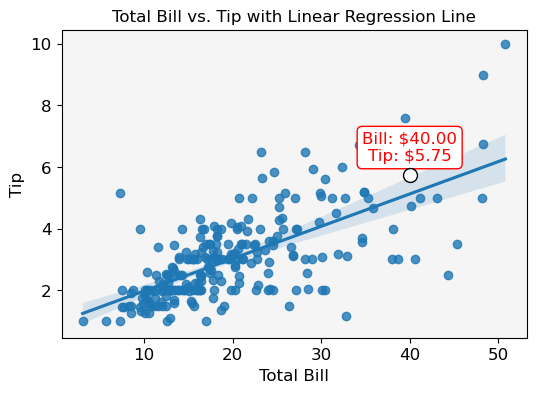

In [ ]:
# Visualize the regression line
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Create the scatter plot with a linear regression line
sns.regplot(x='total_bill', y='tip', data=data)

# Plot the specific point on the line
plt.scatter(total_bill_value, predicted_tip, color='white', s=100, edgecolor='black', zorder=5)

# Annotate the point
plt.annotate(f'Bill: ${total_bill_value:.2f}\nTip: ${predicted_tip:.2f}',
             (total_bill_value, predicted_tip),
             textcoords="offset points",
             xytext=(0,10),
             ha='center',
             color='red',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

# Customize and show the plot
plt.title("Total Bill vs. Tip with Linear Regression Line")
plt.xlabel("Total Bill", fontsize=12)
plt.ylabel("Tip", fontsize=12)

# Increase the size of the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Turn off the grid
plt.grid(False)

plt.savefig('linreg.png')
plt.show()

#### **How Does it Work?**
Linear regression tries to find the best straight line that fits through all these points.

The equation for this line can be expressed as **𝑌 = m𝑋 + b**, where 𝑋 is the independent variable and 𝑌 is the dependent variable. Additionally, the slope of the line is defined as m, and the intercept as b.

In our case, the equation will look something like this:

**Tip = Slope (m) × Total Bill + Intercept (b)**

There are two important parts here:

1. **Slope (m)**: How much the tip increases for each dollar increase in the total bill

2. **Intercept (b)**: The starting point of the line (i.e., the tip amount for a $0 total bill)

Now that our model is trained, we can use **model.coef_** to get the slope of the line which is 0.1437 (14.37%).

In [ ]:
print(f"Slope: {model.coef_[0]:.4f}")

Slope: 0.1437


Similarly, using **model.intercept_**, we can find the intercept as 0.0.

In [ ]:
print(f"Intercept: {model.intercept_:.4f}")

Intercept: 0.0000


After updating the values, our equation now looks like this:

**Predicted Tip = 0.1437 × Total Bill**

**This means:**
- The slope of our regression line is approximately 0.1437, which means for every dollar increase in the total bill, the tip tends to increase by about 14.37 cents.
- We set the intercept to 0, assuming a total bill of 0 would result in a $0 tip.

Now, if a new customer comes in and their total bill is \$25, we can guess their tip: 0.1437 × \$25 = $3.59

Linear regression works best when there’s a fairly straight-line relationship between two things. It’s a simple but powerful tool for understanding and predicting.

## 3. Understanding Loss Functions and Model Optimization

### **Loss Functions**
Loss functions let us *numerically know how far off the model’s predictions are from the actual values*. A model with the lowest loss is considered a better one at making predictions.

#### **Types of Loss Functions**:
Two of the most common loss functions are:

1.	**Squared Error (L2 Loss):** This is simply squaring the difference between the model’s predicted and actual value. *Squared error: (actual – predicted)²*

    For example, if the actual tip is $5 and the model predicted $4, then the squared error will be (5 - 4)² = 1² = 1.

    Suppose if the predicted tip was $3, then squared error would be (5 - 3)² = 2² = 4.

    Note how being off by 2 dollars gives a much higher error than being off by 1 dollar.

    **Mean Squared Error (MSE)**: In practice, instead of calculating squared error for just one observation, we often use the average of all the squared errors across the entire dataset. This is called the **Mean Squared Error (MSE).**

2.	**Absolute Error (L1 Loss):** This is the absolute value of the difference between the model’s predicted and actual value.
   *Absolute error: |actual – predicted|*

   For example, if the actual tip is \$5 and the model predicted \$4, then the absolute error will be |5 - 4| = 1. Suppose if the predicted tip was $3, then absolute error would be |5 - 3| = 2.
   
   **Mean Absolute Error (MAE):** It is the average sum of the absolute difference between the predicted and actual value calculated across the entire dataset. It is the simplest and computationally inexpensive method to calculate loss.


Both MSE and MAE give us a single number that tells us how good our model is overall. A *lower MSE/MAE means our model is making better predictions on average*.

#### **Why Different Loss Functions?**

Different loss functions behave differently with outliers. Squared error (L2) is more sensitive to outliers because it squares the differences. Absolute error (L1) is less affected by outliers.

For example, if someone leaves an unusually high tip of \$50 on a $20 bill:

- L2 loss would result in a very high error, potentially skewing our model.
- L1 loss would still show it’s an error, but wouldn’t exaggerate its importance as much.

Both loss functions can be better under a given circumstances that works best but in general, the difference between the two is usually not that big.

#### **How to Calculate Loss?**

Suppose we want to calculate Mean Squared Error (MSE) for our tips dataset, basic intuition is that we need to first calculate L2 losses using the tip and the model’s prediction:

In [ ]:
# Calculate predictions
data["prediction"] = model.predict(X)

# Calculate L2 Loss (Squared Error)
data["l2_loss"] = (data["prediction"] - data["tip"])**2

print(data[['total_bill', 'tip', 'prediction', 'l2_loss']].sample(5))

     total_bill   tip  prediction   l2_loss
228       13.28  2.72    1.908760  0.658111
103       22.42  3.48    3.222469  0.066322
45        18.29  3.00    2.628856  0.137748
181       23.33  5.65    3.353265  5.274991
177       14.48  2.00    2.081238  0.006600


From the above table, we can see that when the model’s prediction is close to the actual tip, the L2 loss is small and when the prediction is way off, the L2 loss is big.

We can calculate MSE using NumPy or pandas for the entire dataset:

In [ ]:
# Calculate Mean Squared Error (MSE) using NumPy or pandas
np.mean(data["l2_loss"])

1.1781161154513171

In [ ]:
data["l2_loss"].mean()

1.1781161154513171

Or we can use sklearn library to calculate MSE directly:

In [ ]:
# Alternatively, use sklearn's mean_squared_error function
from sklearn.metrics import mean_squared_error
mean_squared_error(data['tip'], model.predict(data[['total_bill']]))

1.1781161154513171

All three different methods will give us the exact same MSE of 1.178.

### **Model Optimization**
Now that we know how to measure our model’s accuracy, how do we improve it? This is where model optimization comes in.

*Model optimization is the process of finding the best possible line that minimizes our chosen loss function (for example: MSE)*. It’s like fine-tuning our model to make the most accurate predictions by adjusting the slope and intercept of our line.

#### **How Does it Work?**

Remember, our equation of the line looks like this:

**Tip = Slope (m) × Total Bill**

The idea is to try different values for slope with the goal to find the point where our loss is the lowest.

This process is usually done automatically using algorithms, but understanding it helps us understand what’s happening “under the hood”.

Let’s create a function to explore how different slopes affect our MSE.

In [ ]:
def mse(slope):
    return mean_squared_error(data['total_bill'] * slope, data['tip'])

And then calculate mse from a list of 100 different values of slopes between 0.1 and 0.2.

In [ ]:
# Compute MSE for various slopes
slopes = np.linspace(0.1, 0.2, 100)
mses = [mse(slope) for slope in slopes]

In [ ]:
# Find the best slope
best_slope = slopes[np.argmin(mses)]
min_mse = np.min(mses)

# Print the results
print("Minimum MSE:", min_mse)
print("Best slope:", best_slope)

Minimum MSE: 1.1781577643348538
Best slope: 0.14343434343434344


When we plot the data, it results in the plot below that shows how different slopes result in different MSEs. *The lowest point on this curve is our optimal slope.*

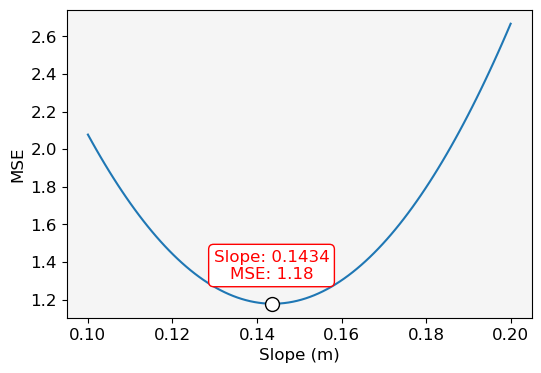

In [ ]:
# Plot the results
plt.figure(figsize=(6,4))
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Plot the lineplot
sns.lineplot(x=slopes, y=mses)

# Plot the specific point (minimum MSE)
plt.scatter(best_slope, min_mse, color='white', s=100, edgecolor='black', zorder=5)

# Annotate the point
plt.annotate(f'Slope: {best_slope:.4f}\nMSE: {min_mse:.2f}',
             (best_slope, min_mse),
             textcoords="offset points",
             xytext=(0,18),
             ha='center',
             color='red',
             fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

# Add titles and labels
plt.xlabel("Slope (m)", fontsize=12)
plt.ylabel("MSE", fontsize=12)

# Increase the size of the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Turn off the grid
plt.grid(False)

plt.savefig('optmod.png')
plt.show()

**Observations:**
- This plot shows how the Mean Squared Error changes with different slopes. The lowest point on this curve represents the optimal slope for our model.
- The optimal slope we found (approximately 0.1437) matches closely with the coefficient our LinearRegression model calculated earlier.
- This validates our model's performance and shows that it has indeed found the best-fitting line for our data.

#### **Finding the Optimal Slope using SciPy**
To find the optimal slope automatically, we can use a special function called **optimize.minimize()** and pass on our objective function (in this case, mse) and initial guess (x0 = 0.2).

In [ ]:
from scipy import optimize

result = optimize.minimize(mse, x0 = 0.2)
optimal_slope  = result.x[0]
optimal_slope

0.14373189035159484

This gives us the optimal slope of about 0.1437. Note that the optimal slope we found through optimization, matches exactly with the coefficient our LinearRegression model found earlier.

*This is because when we trained the model using sklearn, the process involved trying different values of slope until the loss was minimized.*

#### **Why It Matters?**

Understanding model optimization helps us:

1. Find the best possible model for our data.

2. Understand how our model makes predictions.

3. Improve our model’s accuracy over time.

## 4. Multiple Linear Regression
Multiple linear regression is like *considering multiple factors when making a prediction*. Instead of just looking at the total bill to guess the tip, we might also want to consider how many people are at the table, or whether it’s a weekend or not.

Now, in addition to just using the total bill to predict the tip, we also want to use another feature let’s say the number of people at the table (‘size’ column from our dataset).

#### **How Does it Work?**

In simple linear regression, our equation looked like this:

**Tip = Slope (m) × Total Bill + Intercept (b)**

In multiple linear regression, we simply add more factors:

**Tip = (Slope1 × Total Bill) + (Slope2 × Number of People) + Intercept (0)**

Each factor gets its own slope, showing how much it influences the tip and we set the intercept as 0 using **fit_intercept = False** when creating the model object (\$0 tip when the total bill is $0).

To find the values of the slope, we build our model using sklearn library and much of the process remains the same with only difference being is that we add more features that we want to use and update variable X.

In [ ]:
# fit a model on total_bill and size
X = data[['total_bill', 'size']]
y = data['tip']

model = LinearRegression(fit_intercept = False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

Notice when creating the model, we didn’t specify any special parameters to let the model know if we are using multiple features. This is because it is a very user-friendly library which can handle any number of features.

In [ ]:
print("Coefficients for total_bill and size:", model.coef_)

Coefficients for total_bill and size: [0.1007119  0.36209717]


Using **model.coef_**, we get the values as 0.10 for Slope1 (for Total Bill) and 0.36 for Slope2 (for Number of People).

**Observations:**
- In this multiple regression model, we consider both the total bill and the party size to predict the tip. The coefficients show how each factor influences the tip amount.
- Our updated model suggests that for every dollar increase in the total bill, the tip increases by about 10 cents, and for each additional person in the party, the tip increases by about 36 cents.

Now, suppose we have a table of 3 people and total bill was $25, plugging the values from above into our equation we can manually predict the tip as:

**Predicted Tip** = (0.10 × $25) + (0.36 × 3)

=> \$2.50 + $1.08

=> $3.58

Or using the regression model:

In [ ]:
# Make a prediction with the multiple regression model
sample_bill = 25
sample_size = 3
predicted_tip = model.predict(pd.DataFrame([[sample_bill, sample_size]], columns=['total_bill', 'size']))[0]
print(f"For a bill of ${sample_bill} and {sample_size} people, the predicted tip is ${predicted_tip:.2f}")

For a bill of $25 and 3 people, the predicted tip is $3.60


#### **Which Model is Better (Simple vs. Multiple Linear Regression) ?**

Let’s take a look at what this model predicts for our entire dataset.

In [ ]:
data['prediction_2'] = model.predict(X)
data.sample(5)

,total_bill,tip,sex,smoker,day,time,size,prediction,l2_loss,prediction_2
97,12.03,1.50,Male,Yes,Fri,Dinner,2,1.729095,0.052484,1.935759
65,20.08,3.15,Male,No,Sat,Dinner,3,2.886136,0.069624,3.108587
153,24.55,2.00,Male,No,Sun,Dinner,4,3.528618,2.336673,3.920866
179,34.63,3.55,Male,Yes,Sun,Dinner,2,4.977436,2.037572,4.211848
209,12.76,2.23,Female,Yes,Sat,Dinner,2,1.834019,0.156801,2.009278


From the above table we can observe that the difference in predictions between a simple and multiple linear regression model are very close with couple of differences.

But how do we know which one is better? We can use the loss functions such as the mean squared error to determine the accuracy of our models’ predictions.

In [ ]:
mean_squared_error(data['tip'], data['prediction'])

1.1781161154513171

For the simple linear regression model, the mean squared error we get is 1.178.

In [ ]:
mean_squared_error(data['tip'], data['prediction_2'])

1.06482122862577

For the multiple linear regression model, the mean squared error we get is 1.065.

**Observation:**
- Our multiple linear regression model achieves the lowest mean squared error. This means that *when we gave more features or information to the model, it returned higher-quality predictions*.


Does this make sense? Not so because in real world a simple linear regression model is much closer to the actual reality where the tip is a certain percent of the total bill. So, we need to keep in mind a model’s interpretation and real-world applicability as well.

## 5. Handling Non-Numeric Features
Suppose we want to use some more features that are available in the dataset, but they aren’t in a numeric format, like whether it’s a weekend or not?

This can be a challenge as many algorithms only accept numerical variables. To address this issue, we must first *convert these features into numeric scale* and there are several strategies we could utilize to do so.

One basic approach is to use *label encoding* to convert non-numeric features into a numeric scale. Suppose we have a list of colors: blue, green, red and yellow. After conversion, we now have blue = 1, green = 2, red = 3 and yellow = 4. In doing so, we are essentially saying that green is twice as blue and yellow is four times blue. While this technique is commonly used and will work, we could see how the interpretation can be confusing.

One common and popular strategy that we are going to explore is to use *one-hot encoding*. The idea is to convert each unique value of a non-numeric feature into its own dummy feature (binary column). Each of these new columns will have a 1 or 0 indicating the presence or absence of that value in the original column.

For example, we want to use the ‘**day**’ feature as well in addition to the other two features we previously used and it has values such as Thursday, Friday, Saturday and Sunday.

Based on the unique values of the day column, it will create dummy features such as **day_Thur**, **day_Fri**, **day_Sat** and **day_Sun** into its own binary column as shown below.

We can create dummy features in pandas using:

In [ ]:
# Create dummy variables for 'day'
dum_features  = pd.get_dummies(data, columns = ['day'])
dum_features.sample(5)

,total_bill,tip,sex,smoker,time,size,prediction,l2_loss,prediction_2,day_Thur,day_Fri,day_Sat,day_Sun
88,24.71,5.85,Male,No,Lunch,2,3.551615,5.282573,3.212785,1,0,0,0
137,14.15,2.00,Female,No,Lunch,2,2.033806,0.001143,2.149268,1,0,0,0
197,43.11,5.00,Female,Yes,Lunch,4,6.196282,1.431091,5.790079,1,0,0,0
207,38.73,3.00,Male,Yes,Dinner,4,5.566736,6.588135,5.348961,0,0,1,0
166,20.76,2.24,Male,No,Dinner,2,2.983874,0.553349,2.814973,0,0,0,1


**Observation:**
- From the above table, we can see that for each row, only one of the dummy features is 1 if the value is present in the original column and the rest is 0.

#### **Using Our New Features in the Model**

Now that we’ve created these new dummy features, how do we use them in our model? Let’s look at an example:

Our updated model’s equation might look like:

**Tip = (Slope1 × Total Bill) + (Slope2 × Size) + (Slope3 × day_Thur) + … + (Slope6 × day_Sun)**

This allows our model to learn if certain days tend to have higher or lower tips.

Next, we train our model using the updated features and take a look at the model’s predictions.

In [ ]:
# # Prepare data for the new model with numeric and categorical features
X = dum_features[['total_bill', 'size'] + [col for col in dum_features.columns if col.startswith('day_')]]
y = data['tip']

# Create and fit the model
model = LinearRegression(fit_intercept = False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
# Display coefficients
print("Coefficients:")
print(f"Total Bill: {model.coef_[0]:.2f}")
print(f"Party Size: {model.coef_[1]:.2f}")
print(f"Thursday: {model.coef_[2]:.2f}")
print(f"Friday: {model.coef_[3]:.2f}")
print(f"Saturday: {model.coef_[4]:.2f}")
print(f"Sunday: {model.coef_[5]:.2f}")

Coefficients:
Total Bill: 0.09
Party Size: 0.19
Thursday: 0.67
Friday: 0.75
Saturday: 0.62
Sunday: 0.73


Using **model.coef_**, we get the coefficients of the model as shown above.

**Observation:**
- Each coefficient now shows how much that factor influences the tip amount.

Our updated equation will look like this:

**Tip = (0.09 × Total Bill) + (0.19 × Size) + (0.67 × day_Thur) + (0.75 × day_Fri) + (0.62 × day_Sat) + (0.73 × day_Sun)**

This model suggests that:

· For every dollar on the bill, the tip increases by 9 cents

· For each additional person, the tip increases by 19 cents

· If it’s Thursday, add an extra 67 cents to the tip

· If it’s Friday, add an extra 75 cents to the tip

· If it’s Saturday, add an extra 62 cents

· If it’s Sunday, add an extra 73 cents

So, if we have a table of 4 people on a Saturday and the total bill was $30:

**Predicted Tip** = (0.09 × $30) + (0.19 × 4) + (0.62 × 1)

=> \$2.7 + \$0.76 + $0.62

=> $4.08

**Final Observations:**
1. Our simple linear regression model showed a clear relationship between total bill and tip amount.
2. We learned how to evaluate and optimize our model using loss functions.
3. Adding more features, including categorical data, can improve our model's accuracy but also increases complexity.
4. The choice between a simple and complex model often depends on the specific use case and the need for interpretability.

## Conclusion
In this notebook, we've explored linear regression from simple to more complex models. We've seen how to:
1. Build a simple linear regression model
2. Evaluate and optimize our model using loss functions
3. Use multiple features, including non-numeric ones, to improve our predictions

By considering many features, our more complex model might be more accurate, but it’s also harder to explain. Imagine trying to explain a restaurant staff, *‘Your tips are calculated by taking 9% of the bill, adding 19 cents per person, and then adjusting based on the day of the week.’* It’s not as intuitive as saying, *‘People typically tip about 15% of the bill.’*

In some real-world applications, like medical diagnosis or loan approval, being able to explain how a model makes decisions can be just as important as the accuracy of those decisions. So in practice, we often need to balance the desire for accuracy with the need for a simple, easy-to-understand model by selecting only the most important features to include in the final model.